# Pruebas y Manipulación del código

## 0. Importación de librerías

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

from CMPendulum import pendulum as pend, animation as ani, basins as bs, plot_solutions as plot_

In [2]:
%matplotlib auto
%matplotlib auto

Using matplotlib backend: <object object at 0x0000022D71DFE440>
Using matplotlib backend: TkAgg


## 1. Analisis inicial

Las condiciones iniciales corresponden a un conjunto de 3 imanes puestos sobre una circunferencia de radio 0.09 [$m$] de manera simetrica. 

<center> 
<img src="https://raw.githubusercontent.com/AndresGuarin/Images/main/Magnets_page-0001.jpg" width="350px" height="350px">
</center>

### A. Parámetros del código

In [3]:
# Physical parameters
l = 0.5
R = 0
d = 0.03
m = 0.05
mu_P_magn = 2

# Code parameters
h = 0.001
T0 = 2*np.pi*np.sqrt(l/9.8)  # Pendulum period
T = 1                       # Total time of simulation
N = int(T/h)

# Magnets
radio = 0.09 
ang = np.array([0,120,240])
Mx = radio*np.cos(np.deg2rad(ang)); My = radio*np.sin(np.deg2rad(ang))
mu = [-1.4]*3; u = [np.array([0,0,-1])]*3

# Initial Conditions
CI = [0.1, 0.1, 0, 0]

In [4]:
p = pend.pendulum()
p.set_pendulum(R=R,l=l,d=d,m=m,mu_P_magn=mu_P_magn)
p.set_code_parameters(h, N)
p.set_magnets(Mx, My, [0,0,0], mu, u)
p.set_initial_conditions(CI, 'cartesians')
inicio = time.time()
p.find_path(show=True, Return='none')
fin = time.time(); print('Tiempo de ejecución: %.2f'%(fin-inicio))

# Get self
selfp = p.get_self()

====================== Summary report ============================
Physical parameters: 
   l =  0.5
   d =  0.03
   R =  0
   m =  0.05
   mu_P_magn =  2
   mu_P_dir  =  [ 0  0 -1]
   model =  RK4
   law   =  F1
Code parameters:
   h =  0.001
   N =  1000
Initial values
   x  =  0.1
   y  =  0.1
   vx =  0
   vy =  0
   NMAGNETS =  3
   mu_magn  =  [-1.4, -1.4, -1.4]
   mu_dir   =  [array([ 0,  0, -1]), array([ 0,  0, -1]), array([ 0,  0, -1])]
███╗   ███╗ █████╗  ██████╗ ███╗   ██╗███████╗████████╗██╗ ██████╗
████╗ ████║██╔══██╗██╔════╝ ████╗  ██║██╔════╝╚══██╔══╝██║██╔════╝
██╔████╔██║███████║██║  ███╗██╔██╗ ██║█████╗     ██║   ██║██║     
██║╚██╔╝██║██╔══██║██║   ██║██║╚██╗██║██╔══╝     ██║   ██║██║     
██║ ╚═╝ ██║██║  ██║╚██████╔╝██║ ╚████║███████╗   ██║   ██║╚██████╗
╚═╝     ╚═╝╚═╝  ╚═╝ ╚═════╝ ╚═╝  ╚═══╝╚══════╝   ╚═╝   ╚═╝ ╚═════╝

██████╗ ███████╗███╗   ██╗██████╗ ██╗   ██╗██╗     ██╗   ██╗███╗   ███╗
██╔══██╗██╔════╝████╗  ██║██╔══██╗██║   ██║██║     ██║   ██║████╗ ████║
███

### B. Resultados

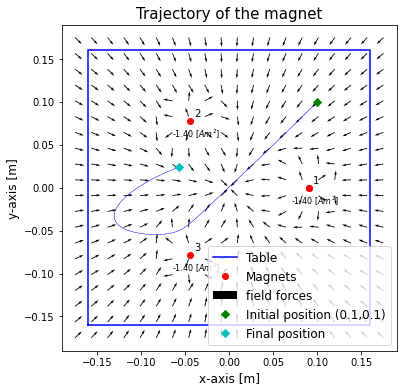

In [6]:
#Plot trajectories
%matplotlib inline
p.plot_alltable()              
p.plot_vector_space(res=20)
p.plot_path()

In [9]:
#Plot Energies evolution
%matplotlib auto
plot_.table_energy_evol(selfp)
plt.show()

Using matplotlib backend: TkAgg


In [12]:
# Plot trayectory 3D
%matplotlib auto
plot_.path3D(selfp)
plt.show()

## 2. Análisis de trayectorias

### A. Parámetros del código

In [14]:
# Physical parameters
l = 0.5
R = 0
d = 0.03
m = 0.05
mu_P_magn = 2

# Code parameters
h = 0.001
T0 = 2*np.pi*np.sqrt(l/9.8)  # Pendulum period
T = 1                       # Total time of simulation
N = int(T/h)

# Magnets
radio = 0.09 
ang = np.array([0,120,240])
Mx = radio*np.cos(np.deg2rad(ang)); My = radio*np.sin(np.deg2rad(ang))
mu = [-1.4]*3; u = [np.array([0,0,-1])]*3

# Initial Conditions
CI = [[0.08, 0.15, 0, 0],
      [0.08, 0.14, 0, 0],
      [0.08, 0.13, 0, 0],
      [0.08, 0.12, 0, 0],
      [0.08, 0.11, 0, 0],
      [0.08, 0.1,  0, 0]]

#CI = [[-0.08, 0.15, 0, 0],
#      [-0.06, 0.14, 0, 0],
#      [-0.04, 0.13, 0, 0],
#      [-0.02, 0.12, 0, 0],
#      [0,     0.11, 0, 0],
#      [0.02,  0.11, 0, 0],
#      [0.04,  0.11, 0, 0],
#      [0.06,  0.11, 0, 0],
#      [0.08,  0.1,  0, 0]]

### B. Función de grafica de trayectorias

In [21]:
def plot_paths(CI):
    #Create pendulum
    p = pend.pendulum()
    p.set_pendulum(R=R,l=l,d=d,m=m,mu_P_magn=mu_P_magn)
    p.set_code_parameters(h, N)
    p.set_magnets(Mx, My, [0,0,0], mu, u)

    p.plot_alltable()              
    p.plot_vector_space(res=20)
    for ci in CI:
        p.set_initial_conditions(ci, 'cartesians')
        p.find_path(show=False, Return='none') 
        selfp=p.get_self()
        plt.plot(selfp.X, selfp.Y,lw=0.5)            # Path
        plt.plot(selfp.X[0], selfp.Y[0],'Dg', ms=5)  # Initial position

    # Put legends, title, labales, and ticks
    plt.legend(fontsize=12)
    plt.title('Trajectories',fontsize=15)
    plt.xlabel('x-axis [m]',fontsize=12)
    plt.ylabel('y-axis [m]',fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(loc='upper right')

### C. Pruebas

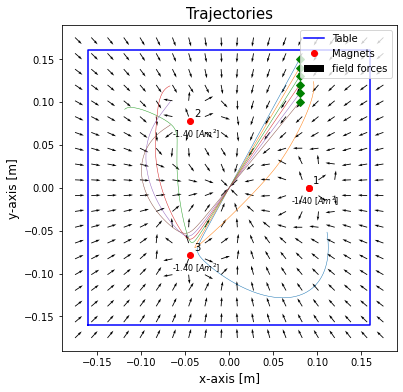

In [23]:
# Initial Conditions
%matplotlib inline
CI = [[0.08, 0.15, 0, 0],
      [0.08, 0.14, 0, 0],
      [0.08, 0.13, 0, 0],
      [0.08, 0.12, 0, 0],
      [0.08, 0.11, 0, 0],
      [0.08, 0.1,  0, 0]]
plot_paths(CI)
plt.savefig('paths.png',dpi=250)
plt.show()

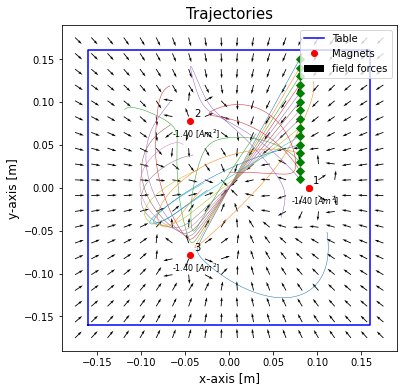

In [24]:
# Initial Conditions
%matplotlib inline
CI = [[0.08, 0.15, 0, 0],
      [0.08, 0.14, 0, 0],
      [0.08, 0.13, 0, 0],
      [0.08, 0.12, 0, 0],
      [0.08, 0.11, 0, 0],
      [0.08, 0.1,  0, 0],
      [0.08, 0.09,  0, 0],
      [0.08, 0.08,  0, 0],
      [0.08, 0.07,  0, 0],
      [0.08, 0.06,  0, 0],
      [0.08, 0.05,  0, 0],
      [0.08, 0.04,  0, 0],
      [0.08, 0.03,  0, 0],
      [0.08, 0.02,  0, 0],
      [0.08, 0.01,  0, 0]]

plot_paths(CI)
plt.savefig('paths.png',dpi=250)
plt.show()